In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
from PIL import Image

import keras
from keras.preprocessing import image
from keras.applications.nasnet import (
    NASNetLarge, 
    preprocess_input, 
    decode_predictions
)

Using TensorFlow backend.


In [2]:
# Load the NASNetLarge model
# https://keras.io/applications/#nasnet
model = NASNetLarge(include_top=True, weights='imagenet')

# Default Image Size for NASNetLarge
image_size = (331, 331, 3)

In [7]:
# Function to load the image, display it and show our NASNetLarge prediction results
def predict(image_path):
    """Use NASNetLarge to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # number of predictions to be returned
    num = 5
    predictions = model.predict(x)
    output = decode_predictions(predictions, top=num)
    plt.imshow(img)
    print("Predictions:")
    for i in range(num):
        print("             {:.2f}: {}".format(output[0][i][2], output[0][i][1]))

Predictions:
             0.91: rocking_chair
             0.01: folding_chair
             0.01: sunglasses
             0.01: sunglass
             0.00: barrow


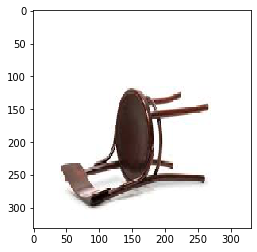

In [8]:
# Load the image and resize to default image size
image_path = os.path.join("..", "images", "chair_on_back.jpg")

# Make predictions
predict(image_path)

Predictions:
             0.60: folding_chair
             0.08: dining_table
             0.05: rocking_chair
             0.01: pedestal
             0.01: desk


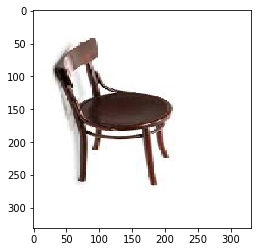

In [9]:
# Try again with rotated image showing the chair upright

###### Prediction as PNG file
# Load the image and resize to default image size
image_path = os.path.join("..", "images", "brown_chair_upright.png")

# Make predictions
predict(image_path)

Predictions:
             0.65: folding_chair
             0.05: dining_table
             0.05: rocking_chair
             0.01: pedestal
             0.01: desk


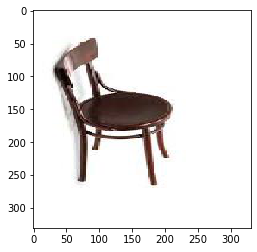

In [16]:
###### Prediction as JPG file
# Load the image and resize to default image size
image_path = os.path.join("..", "images", "brown_chair_upright.jpg")

# Make predictions
predict(image_path)

Predictions:
             0.86: turnstile
             0.01: plate_rack
             0.00: bannister
             0.00: parallel_bars
             0.00: shopping_cart


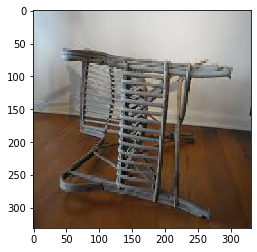

In [17]:
# Try process again with a chair lying on its side, instead of its back

# Load the image and resize to default image size
image_path = os.path.join("..", "images", "chair_on_left_side.jpg")

# Make predictions
predict(image_path)

Predictions:
             0.53: plate_rack
             0.13: rocking_chair
             0.09: cradle
             0.01: folding_chair
             0.01: crib


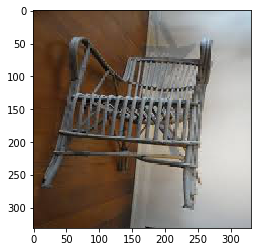

In [18]:
# See if results change for the new version of the gray chair
image_path = os.path.join("..", "images", "gray_chair_upright.png")
predict(image_path)

Predictions:
             0.84: coffee_mug
             0.03: cup
             0.00: espresso
             0.00: teapot
             0.00: coffeepot


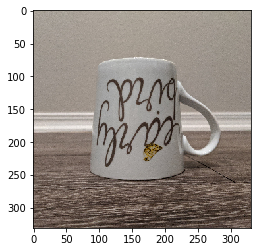

In [15]:
# See if results change for the new version of the gray chair
image_path = os.path.join("..", "images", "objects", "coffee_mug", "coffee_upside_down.jpg")
predict(image_path)